In [18]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from lab_utils_uni import plt_contour_wgrad

In [15]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [4]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost
    
    return cost_sum / (2 * m)

In [5]:
def commpute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [13]:
def gradient(x,y,temp_w,temp_b,alpha,cost_function,gradient_function):
    w = copy.deepcopy(temp_w)
    b = copy.deepcopy(temp_b)

    j_history = [] # Cost function history
    p_history = [] # Paramenter history [w,b]
    stop_i = 0
    while (True):
        dj_dw, dj_db = gradient_function(x,y,w,b)

        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)

        if stop_i > 0:
            tp_w,tp_b = p_history[-1]

            if abs(tp_w - w) <= 1.0e-8 and abs(tp_b - b) <= 1.0e-8:
                p_history.append([w,b])
                stop_i += 1
                break

        p_history.append([w,b])
        stop_i += 1

        j_history.append(cost_function(x,y,w,b))

        if stop_i%10 == 0:
            print(f"Iteration {stop_i:4}: Cost {j_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            
    return w, b, j_history, p_history 

In [16]:
w, b, j_history, p_history = gradient(x_train,y_train,0,0,1.0e-2,compute_cost,commpute_gradient)
print(f"(w,b) found by gradient descent: ({w:8.4f},{b:8.4f})")

Iteration   10: Cost 1.69e+05  dj_dw: -4.751e+02, dj_db: -2.919e+02   w:  5.585e+01, b: 3.43454e+01
Iteration   20: Cost 8.43e+04  dj_dw: -3.355e+02, dj_db: -2.056e+02   w:  9.528e+01, b: 5.85437e+01
Iteration   30: Cost 4.20e+04  dj_dw: -2.369e+02, dj_db: -1.447e+02   w:  1.231e+02, b: 7.55825e+01
Iteration   40: Cost 2.09e+04  dj_dw: -1.674e+02, dj_db: -1.018e+02   w:  1.428e+02, b: 8.75698e+01
Iteration   50: Cost 1.05e+04  dj_dw: -1.183e+02, dj_db: -7.146e+01   w:  1.567e+02, b: 9.59931e+01
Iteration   60: Cost 5.23e+03  dj_dw: -8.370e+01, dj_db: -5.008e+01   w:  1.665e+02, b: 1.01902e+02
Iteration   70: Cost 2.63e+03  dj_dw: -5.927e+01, dj_db: -3.499e+01   w:  1.735e+02, b: 1.06037e+02
Iteration   80: Cost 1.34e+03  dj_dw: -4.203e+01, dj_db: -2.435e+01   w:  1.784e+02, b: 1.08920e+02
Iteration   90: Cost 6.90e+02  dj_dw: -2.986e+01, dj_db: -1.684e+01   w:  1.819e+02, b: 1.10921e+02
Iteration  100: Cost 3.69e+02  dj_dw: -2.128e+01, dj_db: -1.155e+01   w:  1.844e+02, b: 1.12299e+02


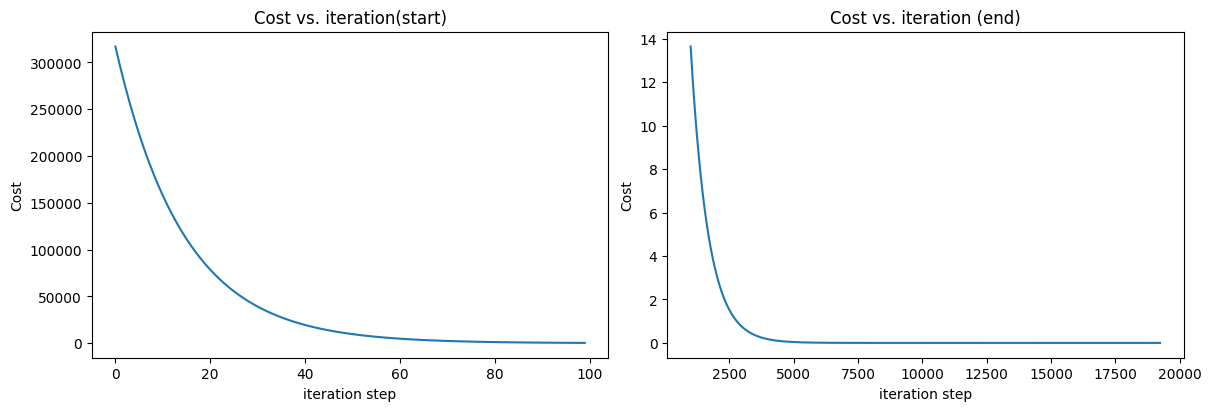

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(j_history[:100])
ax2.plot(1000 + np.arange(len(j_history[1000:])), j_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

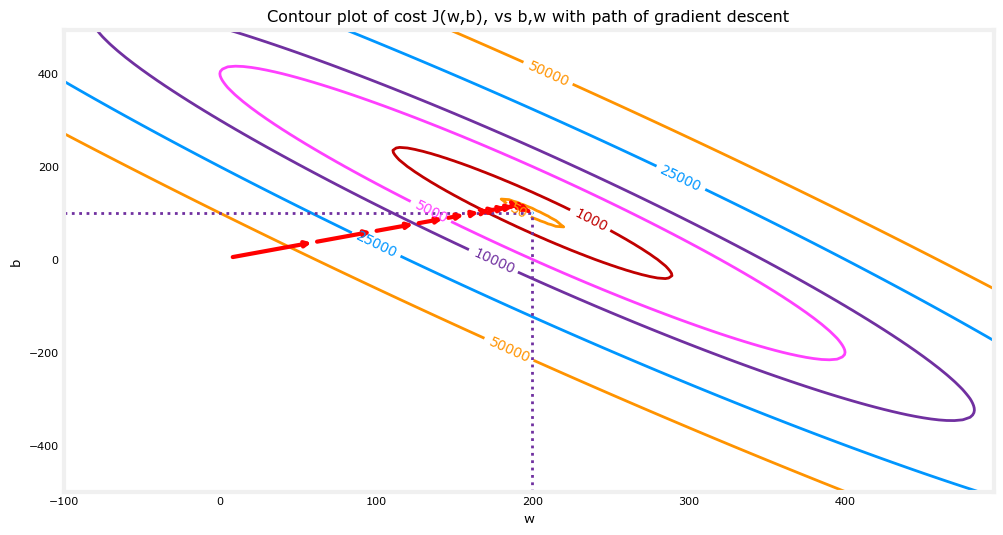

In [19]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_history, ax)